In [1]:
import sys
import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Parameters

In [2]:
run = 'test'
first_level_dir = '/home/ubuntu/data/learning-habits/bids_dataset/derivatives/nilearn/no_modulation_20250123'

# Load design matrices

In [3]:
DM_paths = [
    glob.glob(os.path.join(first_level_dir, sub_id,f"run-{run}",f"{sub_id}_run-{run}_design_matrix.csv"))[0]
    for sub_id in os.listdir(first_level_dir)
]
DM_paths.sort()

DMs = [pd.read_csv(path) for path in DM_paths]

In [4]:
DMs[1].head()

,first_stim_presentation,iti,purple_frame,response,second_stim_presentation,csf,rot_x,rot_y,rot_z,trans_x,...,physio10,physio11,physio12,physio13,physio14,physio15,physio16,physio17,physio18,constant
0,0.001193,0.000000e+00,0.000000,0.000000,0.000001,7.188936,0.002965,0.000977,-0.003855,0.223995,...,-0.271985,-0.915848,0.401526,0.852049,-0.523462,-0.875941,-0.482419,-0.711709,-0.702475,1.0
1,0.098618,6.158285e-10,0.031471,0.002841,0.028829,18.272220,0.003141,0.001032,-0.003636,0.224004,...,-0.999992,0.711213,0.702976,-0.999970,0.007766,0.844980,-0.534797,0.531512,0.847051,1.0
2,0.164194,4.382822e-02,0.325648,0.009661,0.078270,17.816200,0.002965,0.001134,-0.003651,0.224017,...,-0.555479,0.772906,-0.634521,0.382886,0.923795,-0.602634,0.798018,0.057826,-0.998327,1.0
3,0.095794,4.083274e-01,0.414833,0.007293,0.054830,18.821341,0.003152,0.001178,-0.003787,0.224011,...,0.992501,-0.565953,0.824438,-0.970118,0.242634,0.128624,-0.991693,-0.968535,-0.248878,1.0
4,0.029645,8.517461e-01,0.220507,0.002816,0.020053,28.971646,0.002965,0.001233,-0.003787,0.223980,...,0.134461,0.979606,0.200927,0.963840,0.266480,0.589708,0.807617,0.692946,0.720990,1.0


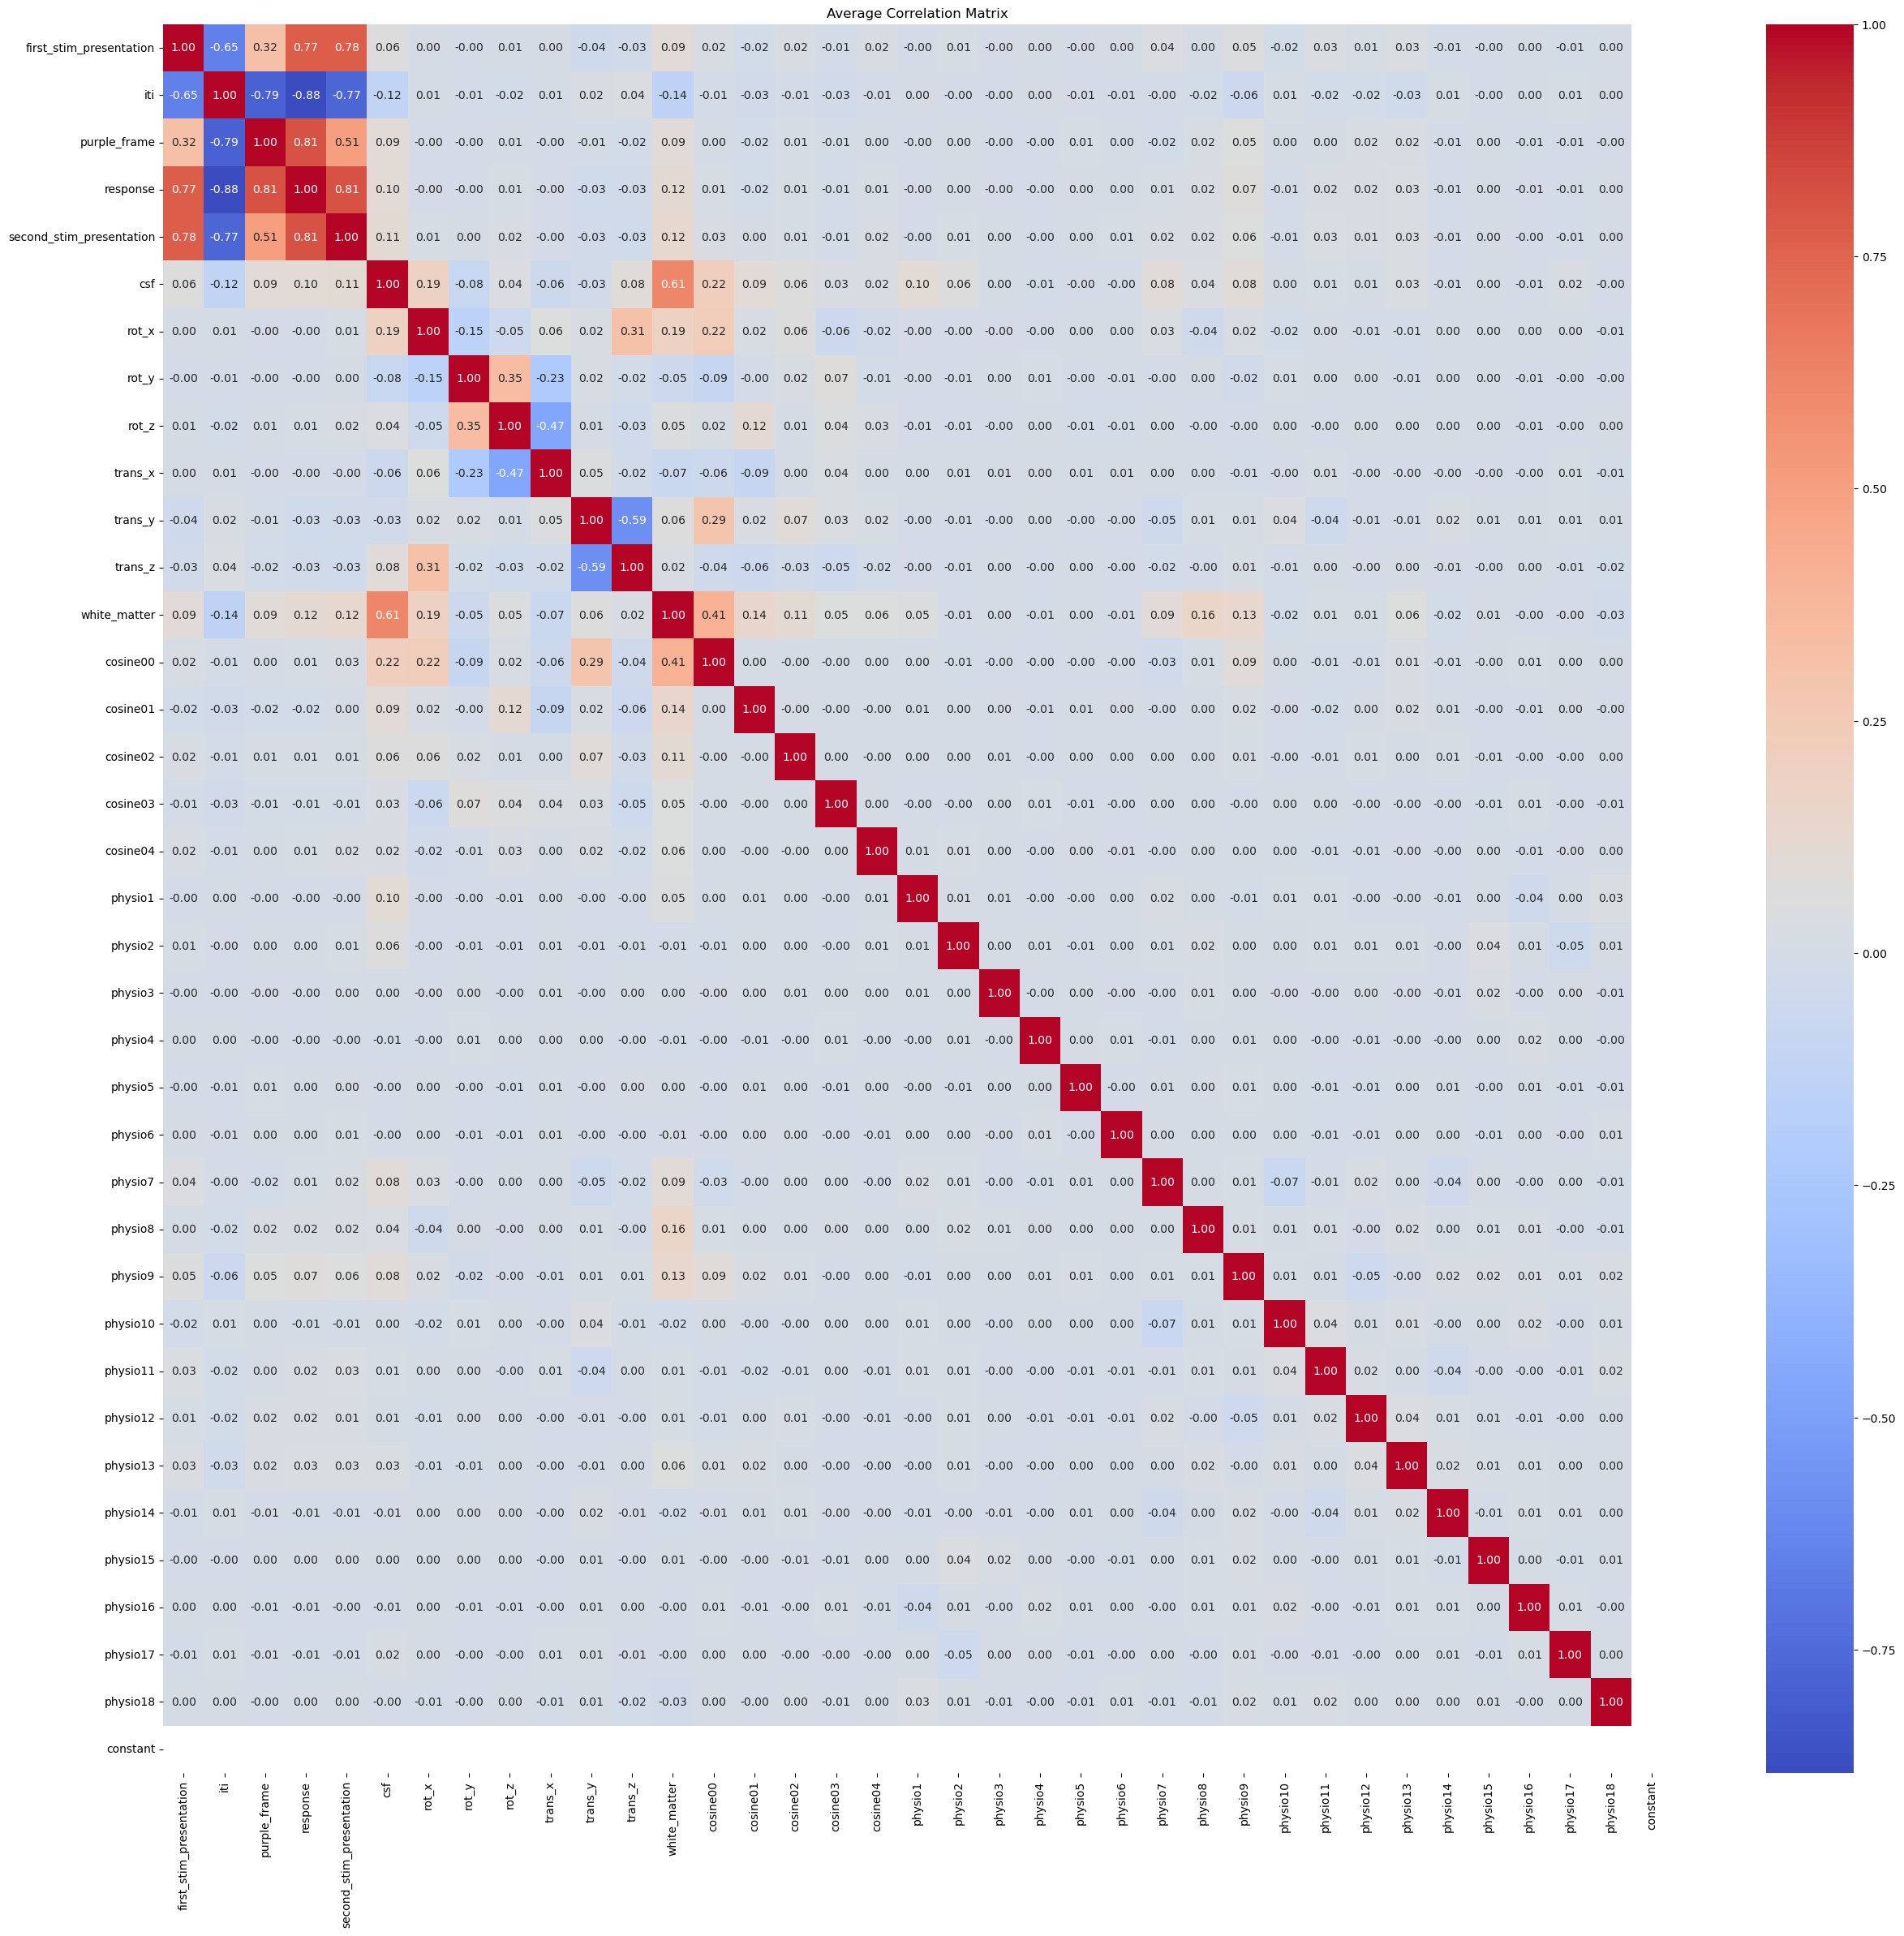

In [8]:
import seaborn as sns

# Drop the extra column if present
aligned_DMs = [dm.drop(columns=['non_response_feedback'], errors='ignore') for dm in DMs]


# Compute the average correlation matrix
average_correlation_matrix = np.mean([dm.corr().values for dm in aligned_DMs], axis=0)

plt.figure(figsize=(30, 28))
sns.heatmap(average_correlation_matrix, xticklabels=aligned_DMs[0].columns, 
            yticklabels=aligned_DMs[0].columns, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Average Correlation Matrix')
plt.show()

In [13]:
threshold = .6
average_correlation_df = pd.DataFrame(average_correlation_matrix, 
									  columns=aligned_DMs[0].columns, 
									  index=aligned_DMs[0].columns)
high_corr_pairs = np.abs(average_correlation_df).unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1.0]  # Remove self-correlations
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]

print("Highly correlated columns:", high_corr_pairs)

Highly correlated columns: iti                       response                    0.882671
response                  iti                         0.882671
                          purple_frame                0.814527
purple_frame              response                    0.814527
response                  second_stim_presentation    0.809517
second_stim_presentation  response                    0.809517
iti                       purple_frame                0.791405
purple_frame              iti                         0.791405
second_stim_presentation  first_stim_presentation     0.776895
first_stim_presentation   second_stim_presentation    0.776895
                          response                    0.772391
response                  first_stim_presentation     0.772391
iti                       second_stim_presentation    0.768944
second_stim_presentation  iti                         0.768944
first_stim_presentation   iti                         0.652429
iti                       fi